## Homework 2

#### John Stachurski

OSM 2018

### Exercise 1

Write your own version of a one dimensional [kernel density estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation), which estimates a density from a sample.

Write it as a class that takes the data $X$ and bandwidth $h$ when initialized and provides a method $f$ such that

$$
    f(x) = \frac{1}{hn} \sum_{i=1}^n 
    K \left( \frac{x-X_i}{h} \right)
$$

For $K$ use the Gaussian kernel ($K$ is the standard normal density).

Write the class so that the bandwidth defaults to Silverman's rule (see the "rule of thumb" discussion on [this page](https://en.wikipedia.org/wiki/Kernel_density_estimation)).  Test the class you have written by going through the steps

1. simulate data $X_1, \ldots, X_n$ from distribution $\phi$
2. plot the kernel density estimate over a suitable range
2. plot the density of $\phi$ on the same figure

for distributions $\phi$ of the following types


* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 2$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = 2$ and $\beta = 5$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 0.5$

Use $n=100$.

Make a comment on your results.  (Do you think this is a good estimator of these distributions?)

In [3]:
import numpy as np
from scipy.stats import norm


class KDE(object):
    
    def __init__(self, X, h = None):
        '''
        Constructor for KDE class
        '''
        
        self.X = X
        self.n = X.size
        if h is None:
            self.h = (np.std(X)) * (( 4 / (3 * self.n) )**(1/5))
        else:
            self.h = h
            
    
    def f_x(self, x):
        '''
        KDE estimator function
        '''
        
        x_vals = norm.pdf((x - self.X)/self.h, 0, 1 )
        return np.sum(x_vals) / (self.h * self.n)
    
    def vec_f_x(self, x_vec):
        '''
        KDE estimator function for a vector of x_vals
        '''
        
        vec = np.empty(x_vec.size)
        
        for i in range(vec.shape[0]):
            vec[i] = self.f_x(x_vec[i])
       
        return vec 
    

In [4]:
from scipy.stats import beta
import matplotlib.pyplot as plt 
n = 100
beta1 = beta.rvs(2, 2, size=n)
kde1 = KDE(beta1)

beta2 = beta.rvs(2, 5, size=n)
kde2 = KDE(beta2)

beta3 = beta.rvs(.5, .5, size=n)
kde3 = KDE(beta3)

x_vals = np.linspace(0, 1, n)

# plot beta1
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)

ax[0].plot(x_vals, beta.pdf(x_vals, 2, 2))
ax[0].plot(x_vals, kde1.vec_f_x(x_vals))
ax[0].set_title('a = 2; b = 2')

ax[1].plot(x_vals, beta.pdf(x_vals, 2, 5))
ax[1].plot(x_vals, kde2.vec_f_x(x_vals))
ax[1].set_title('a = 2; b = 5')

ax[2].plot(x_vals, beta.pdf(x_vals, .5, .5))
ax[2].plot(x_vals, kde3.vec_f_x(x_vals))
ax[2].set_title('a = .5; b = .5')

fig.suptitle('Beta distributions with kernel estimates')
plt.show()

As we can see, we have a decent approximation of the distribution until the a=0.5; b=0.5 parameterization. This makes sense, as Silverman's rule of thumb yields decent results when the underlying distribution is close to normal, as in the first two parameterizations but yields worse results when the underlying distribution is far from normal, just like the last parameterization

### Exercise 2

In class we discussed the following fact:  For the $AR(1)$ process

$$ X_{t+1} = \rho X_t + b + \sigma \xi_{t+1} $$

with $\{ \xi_t \}$ iid and standard normal, 

$$ 
    \psi_t = N(\mu, s^2) \implies \psi_{t+1} 
    = N(\rho \mu + b, \rho^2 s^2 + \sigma^2) 
$$

Confirm this, at least approximately, by simulation.  Let

* $\rho = 0.9$
* $b = 0.0$
* $\sigma = 0.1$
* $\mu = -3$
* $s = 0.2$

First, plot $\psi_t$ and $\psi_{t+1}$ using the true distributions described above.

Second, plot $\psi_{t+1}$ on the same figure (in a different color) as follows:

1. Generate $n$ draws of $X_t$ from the $N(\mu, s^2)$ distribution
2. Update them all using the rule $X_{t+1} = \rho X_t + b + \sigma \xi_{t+1}$
3. Use the resulting sample of $X_{t+1}$ values to produce a density estimate via kernel density estimation.

Try this for several different values of $n$ and confirm that the simulation based estimate of $\psi_{t+1}$ does converge to the theoretical distribution.

In [ ]:
from scipy.stats import norm
rho = 0.9
b = 0.0
sigma = 0.1
mu = -3
s = 0.2

x_vals = np.linspace(-3.5, -2.0, 1000)

In [11]:
def sim_x_p1(rho, b, sigma, mu, s, n):
    '''
    Simulate X(t+1) values per above
    '''
    
    xt = norm.rvs(size = n, loc = mu, scale = s**2)
    et_p1 = norm.rvs(size = n)
    xt_p1 = rho*xt + b + sigma*et_p1
    
    return xt_p1

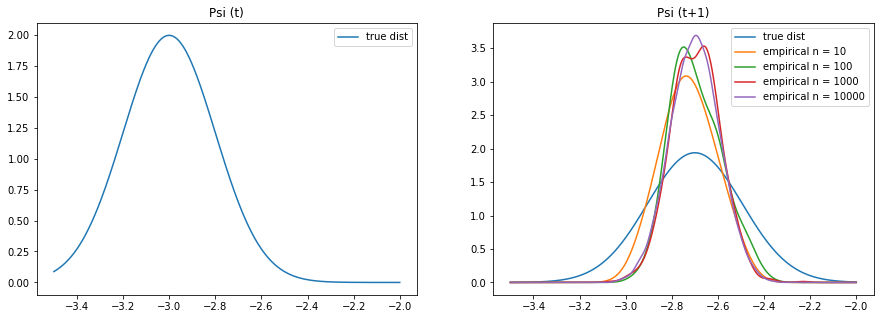

In [16]:
# plot true distributions
n_list = [10, 100, 1000, 10000]
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)

ax[0].plot(x_vals, norm.pdf(x_vals, loc = mu, scale = s), label='true dist')
ax[0].set_title('Psi (t)')
ax[0].legend()

ax[1].plot(x_vals, norm.pdf(x_vals, loc = rho*mu + b, scale = np.sqrt(rho**2 * s**2 + sigma**2)), label='true dist')
ax[1].set_title('Psi (t+1)')

for n in n_list:
    sample = sim_x_p1(rho, b, sigma, mu, s, n)
    kde_p1 = KDE(sample)
    l = 'empirical n = {}'.format(n)
    ax[1].plot(x_vals, kde_p1.vec_f_x(x_vals), label=l)

ax[1].legend()

The empirical distributions are convergining as n goes to infinity but it appears there is a slight difference in the shape of the distribution. The mean is the same but the variance is a bit off - I don't believe I have made any computation errors so I conjecture this is a result of some kernel estimation errors.

### Exercise 3

In the lecture it was claimed that, for $n \times n$ matrix $A$, we have

$$ r(A) < 1 \implies A^k \to 0 $$

where convergence is in terms of the spectral norm.  

Prove this using Gelfand's formula.

See attached PDF for proofs